IMPORTING LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

df=pd.read_csv('survey.csv')
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

STATISTICAL ANALYSIS

In [6]:
print(df.shape)
df.describe()

(1259, 27)


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


DATA PREPROCESSING

<Axes: >

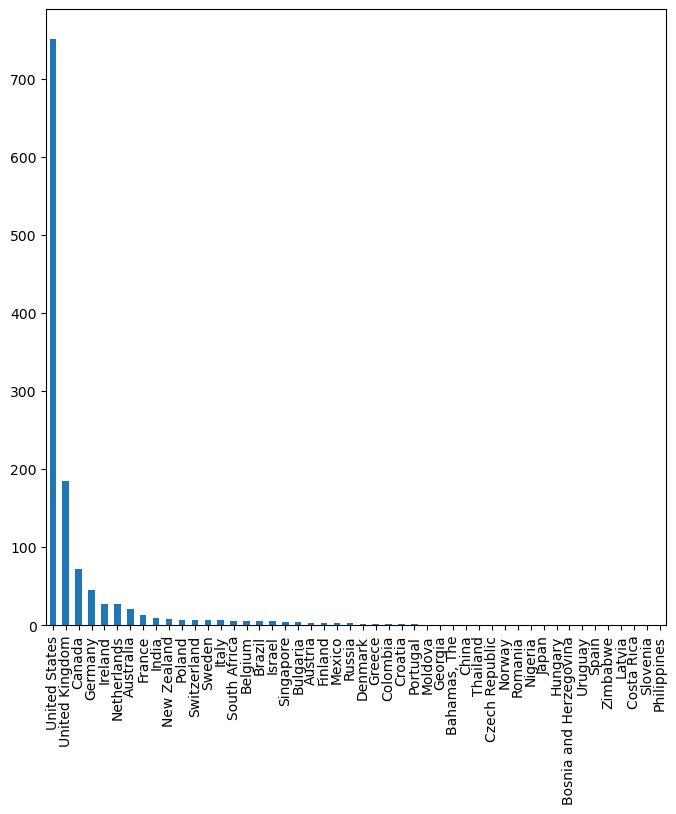

In [7]:
a=df['Country'].value_counts()
a.plot(figsize=(8,8),kind='bar')

<Axes: >

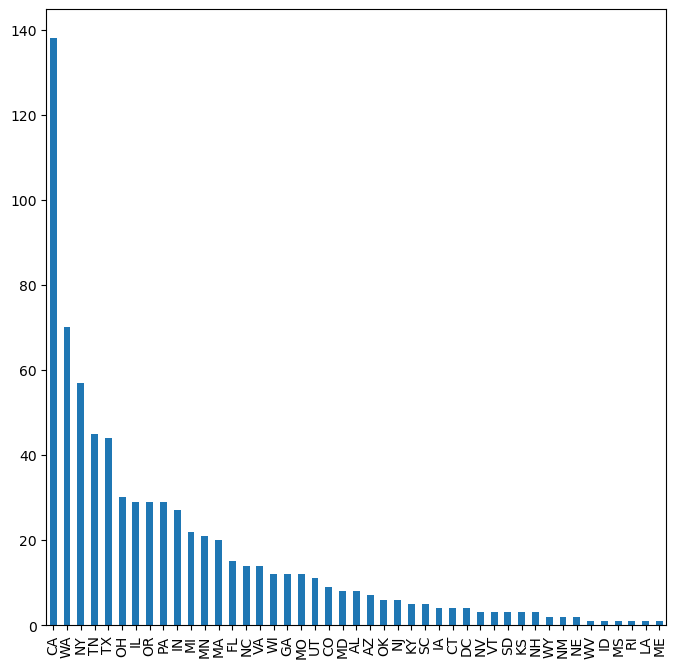

In [8]:
a=df['state'].value_counts()
a.plot(figsize=(8,8),kind='bar')

<Axes: >

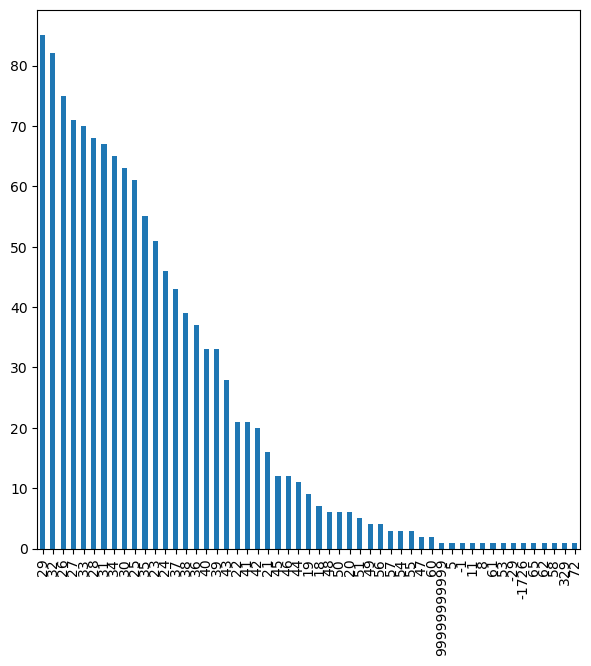

In [9]:
df['Age'].value_counts().plot(kind='bar',figsize=(7,7))

In [10]:
#AGE COLUMN SHOULD ONLY HAVE VALUES BETWEEN 18 AND 60
df.drop(df[(df['Age']>60)|(df['Age']<18)].index,inplace=True)

In [11]:
#REMOVING UNIMPORTANT COLUMNS
df.drop(columns=['Country','state','Timestamp','comments'],axis=1,inplace=True)

In [12]:
#CHECKING NULL VALUES
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               261
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [13]:
df["self_employed"] = df["self_employed"].fillna(df["self_employed"].mode()[0])
df["work_interfere"] = df["work_interfere"].fillna(df["work_interfere"].mode()[0])
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [14]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [15]:
#SIMPLIFYING GENDER COLUMN
df.Gender.replace(['Male','male','M','m','Male ','Cis Male','Man','cis male','Mail','Male-ish',
                  'Male (CIS)','Cis Man','msle','Malr','Mal','maile','Make'],'Male',inplace=True)
df.Gender.replace(['Female','female','F','f','Woman','Female ','femail','Cis Female','cis-female/femme',
                  'Femake','Female (cis)','woman'],'Female',inplace=True)
df.Gender.replace(['Female (trans)','queer/she/they','non-binary','fluid','queer','Androgyne','Trans-female',
                  'male leaning androgynous','Agender','A little about you','Nah','All',
                   'ostensibly male, unsure what that really means','Genderqueer','Enby','p','Neuter',
                  'something kinda male?','Guy (-ish) ^_^','Trans woman'],'Non Binary',inplace=True)
df.Gender.value_counts()

Male          983
Female        246
Non Binary     18
Name: Gender, dtype: int64

In [16]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [17]:
### Attribute: Age

In [18]:
min_age = df["Age"].min()
max_age = df["Age"].max()
mean_age = df["Age"].mean()
median_age = df["Age"].median()

print(f"Min: {min_age}, \nMax: {max_age}, \nMean: {mean_age}, \nMedian: {median_age}")

Min: 18, 
Max: 60, 
Mean: 31.97113071371291, 
Median: 31.0


In [19]:
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 51, 49, 53], dtype=int64)

DATA VISUALIZATION

<Axes: >

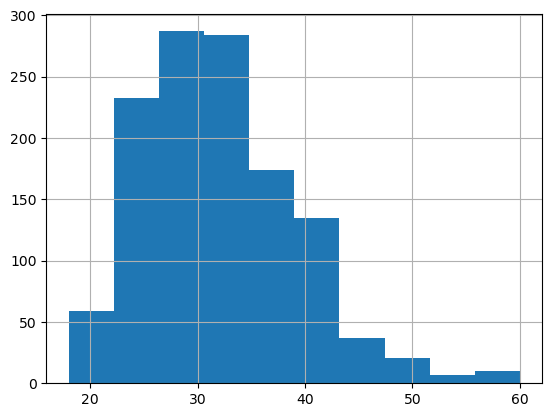

In [20]:
df["Age"].hist()

<Axes: xlabel='Age'>

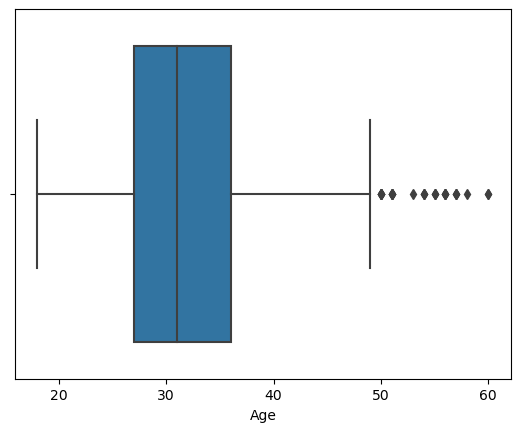

In [21]:
sns.boxplot(x=df["Age"])

In [22]:

variance_age = df["Age"].var()
standard_dev_age = statistics.stdev(df["Age"])

print(f"Mean: {round(mean_age, 2)}"
      f"\nVariance: {round(variance_age, 2)}"
      f"\nStandard Deviation: {round(standard_dev_age, 2)}")

Mean: 31.97
Variance: 49.74
Standard Deviation: 7.05


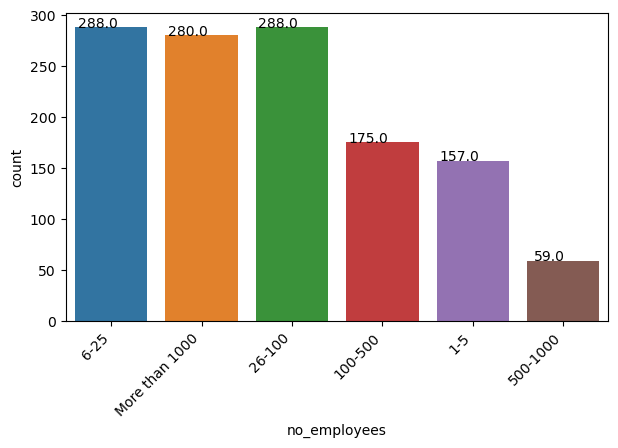

In [23]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x='no_employees', data=df)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')
# Then we also display the values for each bar above it;
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

In [24]:
### Other Attributes: No. of Employees, Family History, Remote Work, Self-Employed & Tech Company

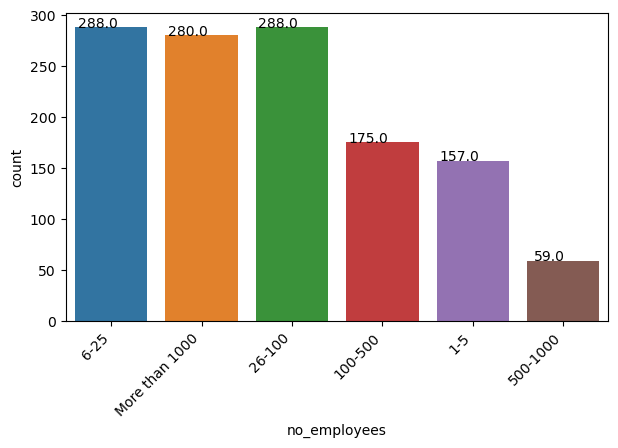

In [25]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x='no_employees', data=df)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')
# Then we also display the values for each bar above it;
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

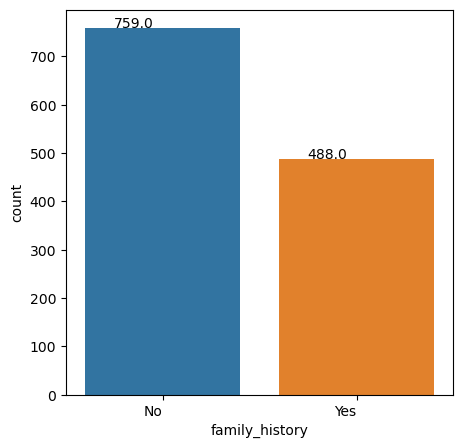

In [26]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='family_history', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

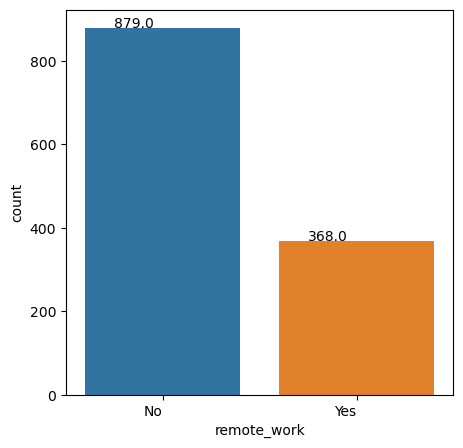

In [27]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='remote_work', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

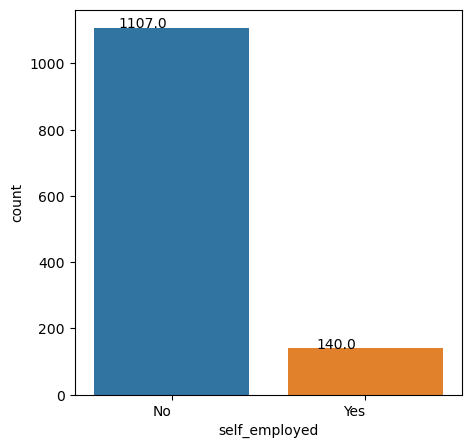

In [28]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='self_employed', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

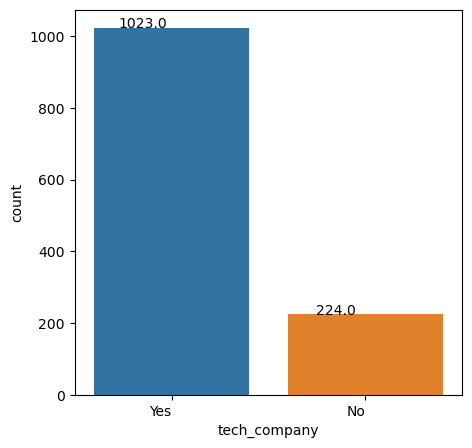

In [29]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='tech_company', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

In [30]:
### Conclusion of Univariate Analysis

In [31]:
# 1.) USA, UK and Canada accounts for the most cases
# 2.) Mental Health issues affect more of individuals who are;
    # Employees
    # Aged between 25-40
    # Working in the office, and not remote, and
    # Working in Tech companies

In [32]:
### Bivariate & Multivariate Analysis

In [33]:
df.describe()

,Age
count,1247.000000
mean,31.971131
std,7.052598
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,60.000000


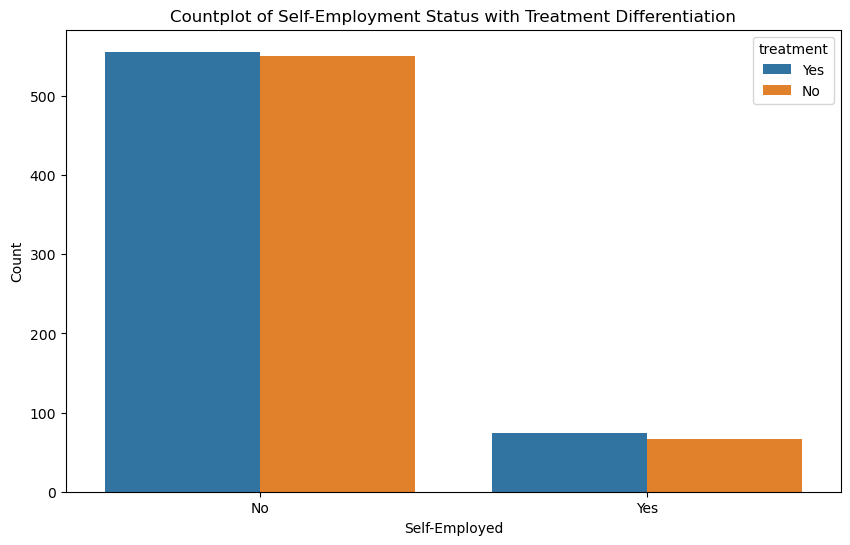

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='self_employed', hue='treatment', data=df)
plt.title('Countplot of Self-Employment Status with Treatment Differentiation')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()

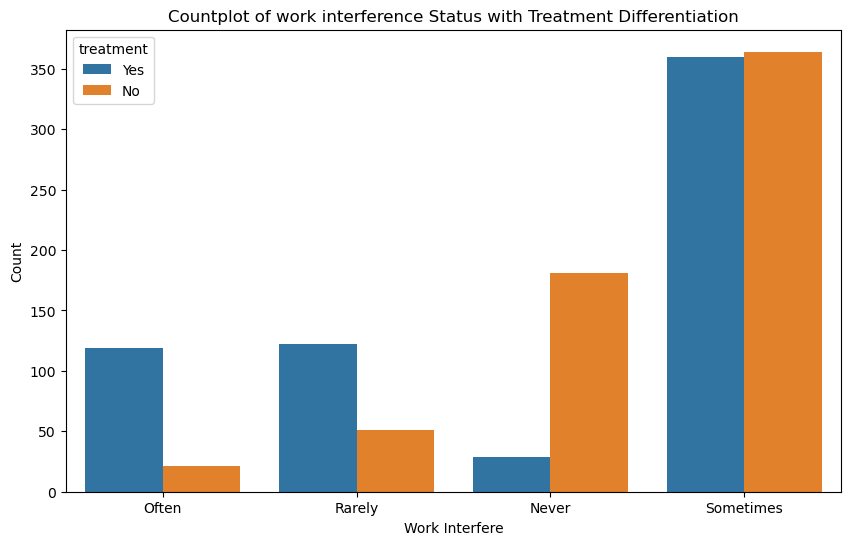

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='work_interfere', hue='treatment', data=df)
plt.title('Countplot of work interference Status with Treatment Differentiation')
plt.xlabel('Work Interfere')
plt.ylabel('Count')
plt.show()

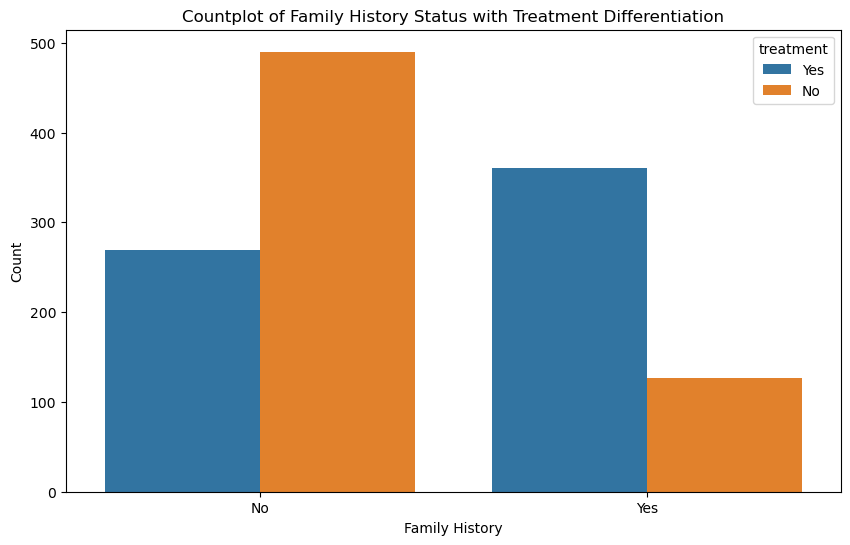

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title('Countplot of Family History Status with Treatment Differentiation')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

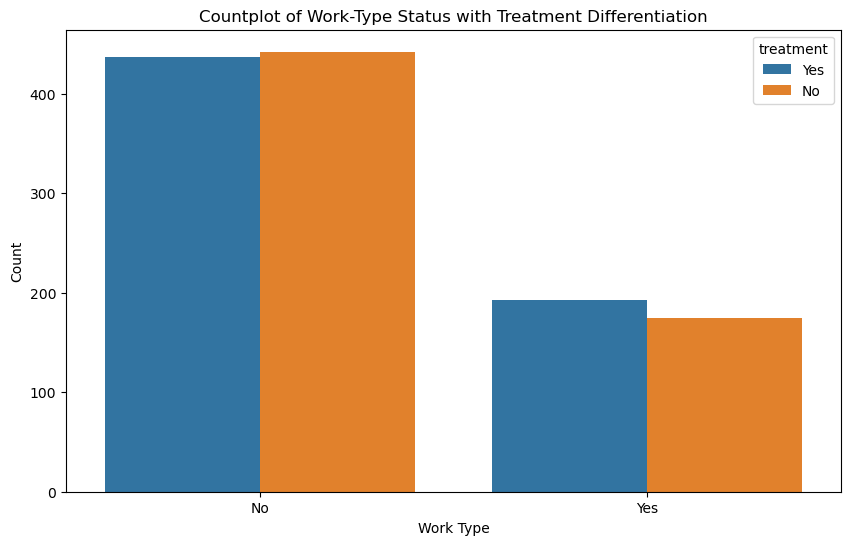

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='remote_work', hue='treatment', data=df)
plt.title('Countplot of Work-Type Status with Treatment Differentiation')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

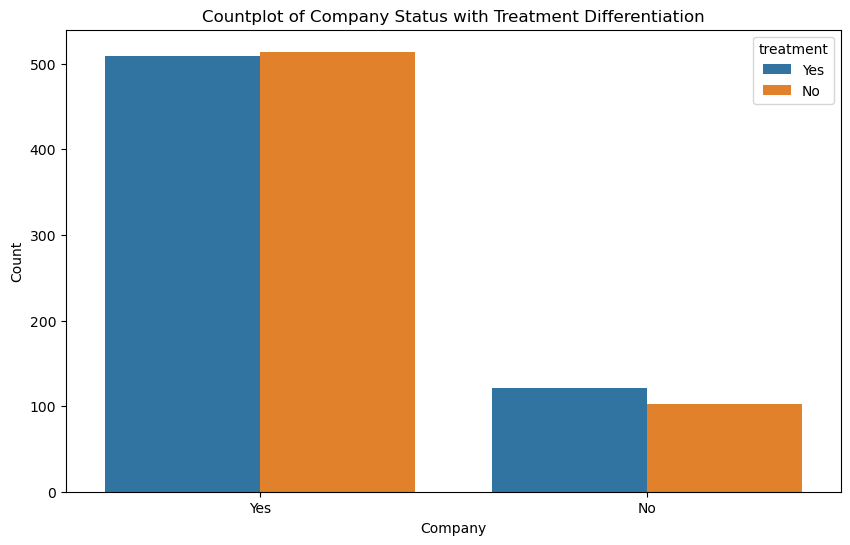

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='tech_company', hue='treatment', data=df)
plt.title('Countplot of Company Status with Treatment Differentiation')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

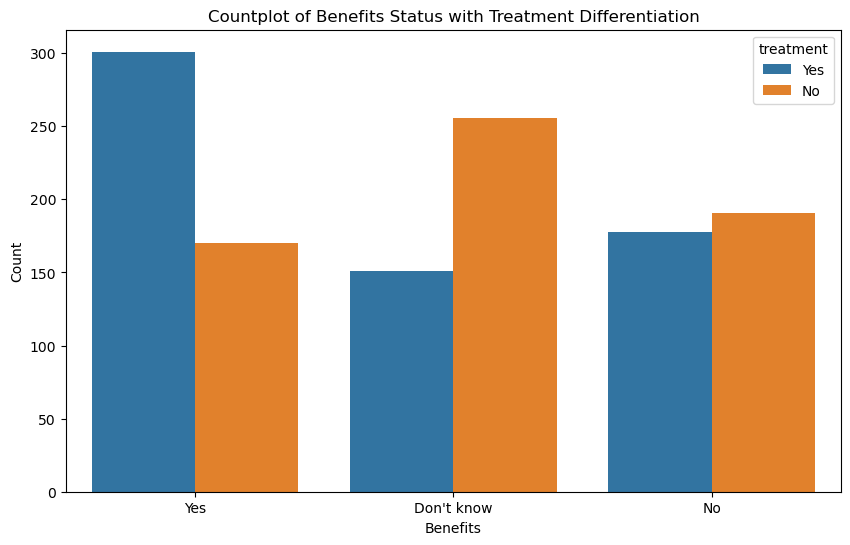

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='benefits', hue='treatment', data=df)
plt.title('Countplot of Benefits Status with Treatment Differentiation')
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.show()

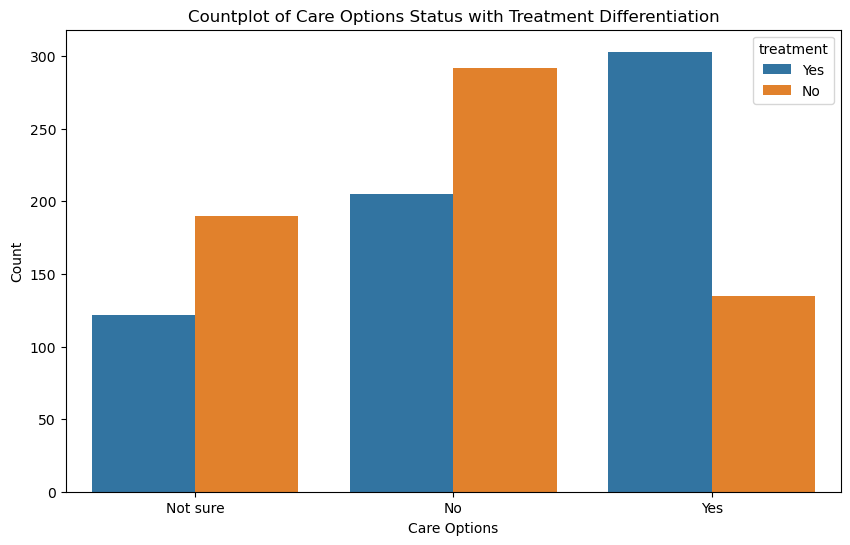

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='care_options', hue='treatment', data=df)
plt.title('Countplot of Care Options Status with Treatment Differentiation')
plt.xlabel('Care Options')
plt.ylabel('Count')
plt.show()

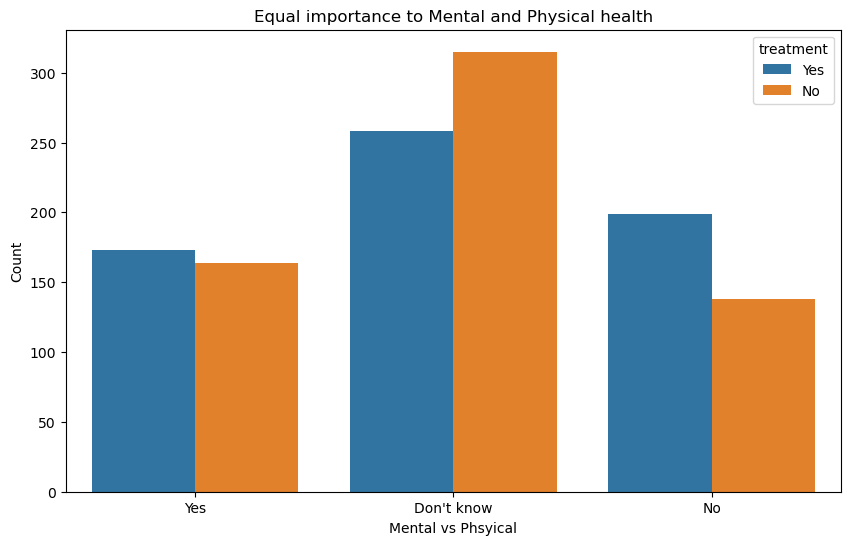

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mental_vs_physical', hue='treatment', data=df)
plt.title('Equal importance to Mental and Physical health')
plt.xlabel('Mental vs Phsyical')
plt.ylabel('Count')
plt.show()

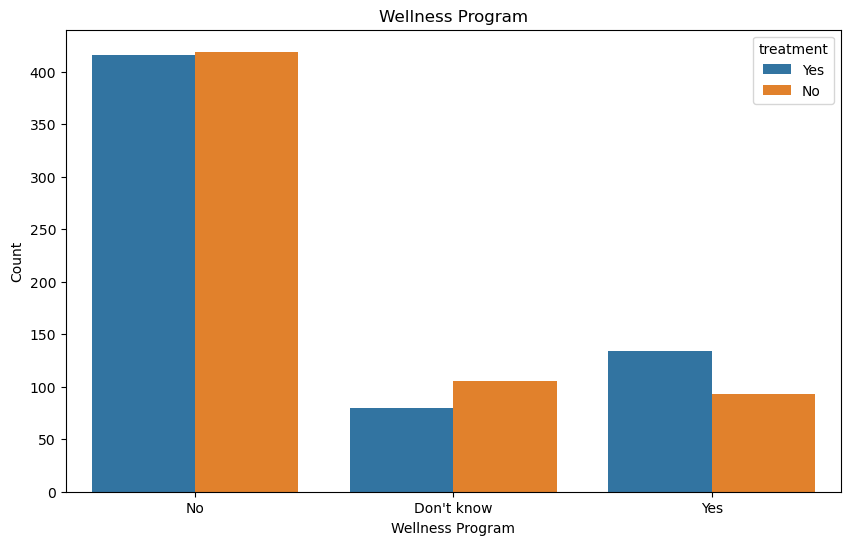

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='wellness_program', hue='treatment', data=df)
plt.title('Wellness Program')
plt.xlabel('Wellness Program')
plt.ylabel('Count')
plt.show()

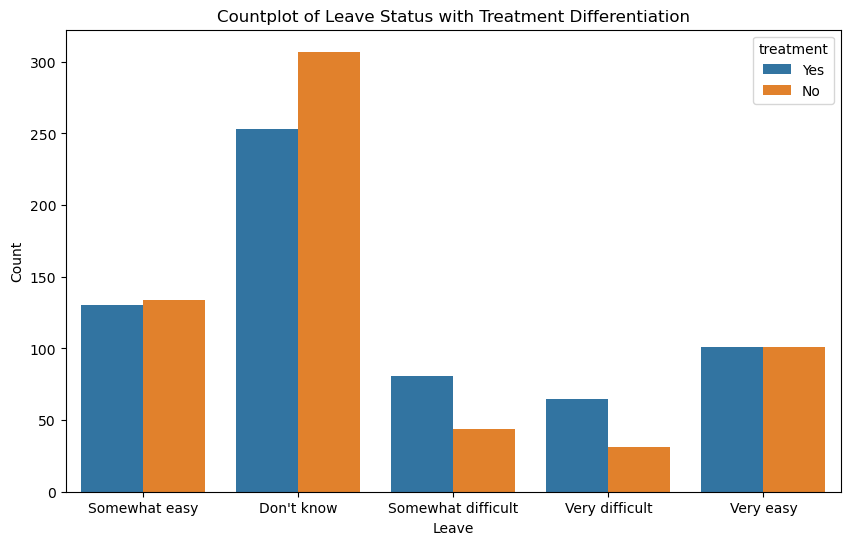

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='leave', hue='treatment', data=df)
plt.title('Countplot of Leave Status with Treatment Differentiation')
plt.xlabel('Leave')
plt.ylabel('Count')
plt.show()

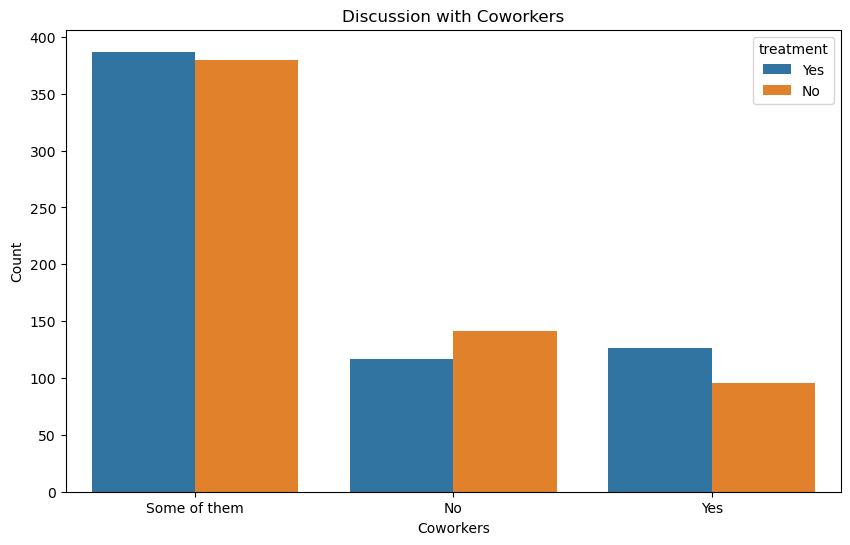

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='coworkers', hue='treatment', data=df)
plt.title('Discussion with Coworkers')
plt.xlabel('Coworkers')
plt.ylabel('Count')
plt.show()

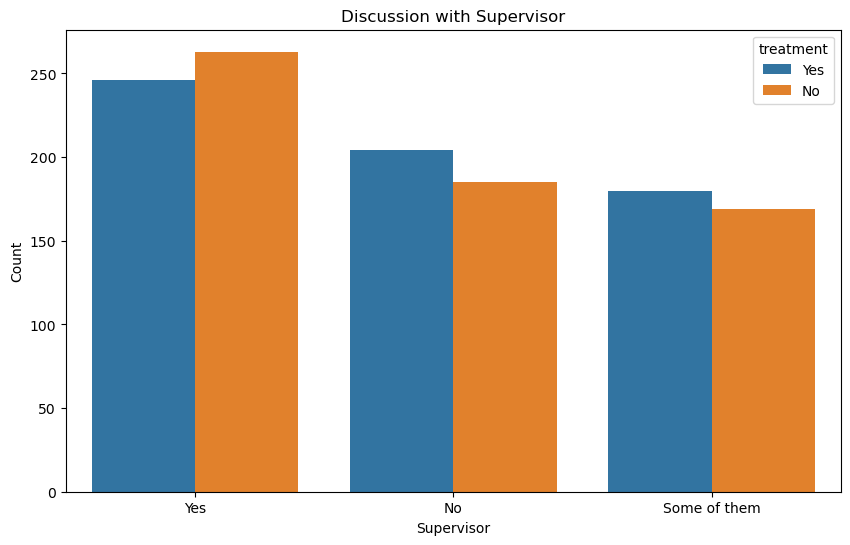

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='supervisor', hue='treatment', data=df)
plt.title('Discussion with Supervisor')
plt.xlabel('Supervisor')
plt.ylabel('Count')
plt.show()

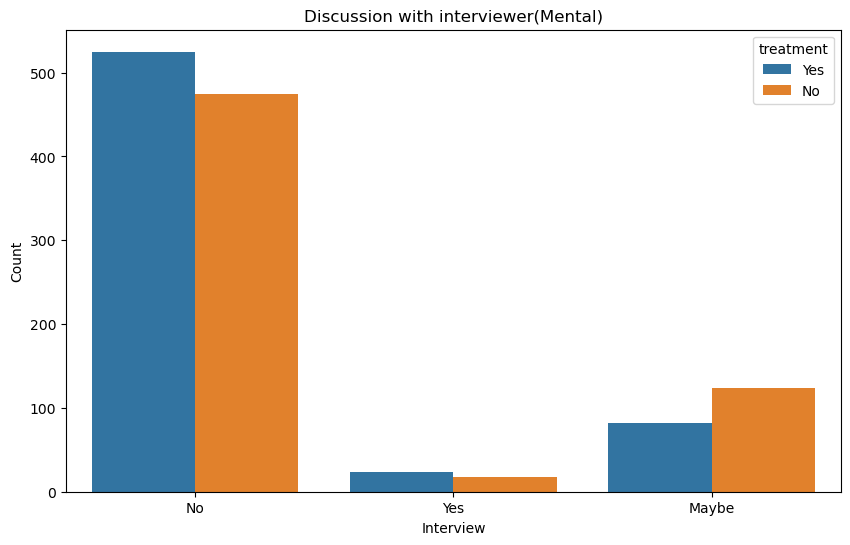

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mental_health_interview', hue='treatment', data=df)
plt.title('Discussion with interviewer(Mental)')
plt.xlabel('Interview')
plt.ylabel('Count')
plt.show()

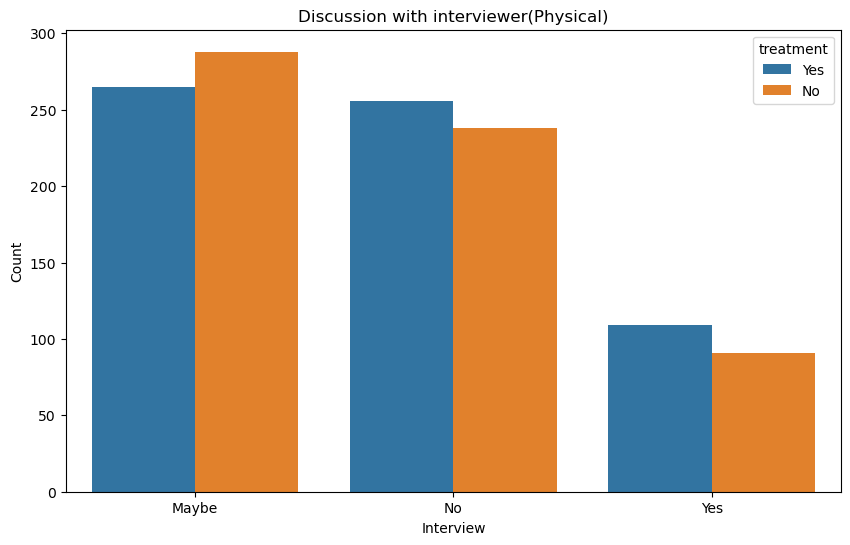

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='phys_health_interview', hue='treatment', data=df)
plt.title('Discussion with interviewer(Physical)')
plt.xlabel('Interview')
plt.ylabel('Count')
plt.show()

In [48]:
df.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,4,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,724,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#ENCODING CATEGORICAL COLUMNS INTO NUMERICAL COLUMNS
x=df.drop('treatment',axis=1)
y=df.treatment
ct=ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history','work_interfere','no_employees','remote_work','tech_company',
                                               'benefits','care_options','wellness_program','seek_help','anonymity','leave'
                                              ,'mental_health_consequence','phys_health_consequence','coworkers','supervisor',
                                              'mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])],remainder='passthrough')
x=ct.fit_transform(x)
le=LabelEncoder()
y=le.fit_transform(y)

In [50]:
#SAVING VALUES
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [51]:
#SPLITTING INTO TRAINING AND TESTING DATA
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=49)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(872, 22) (375, 22) (872,) (375,)


MACHINE LEARNING MODEL

In [52]:
model_dict = {}
model_dict['Logistic regression']= LogisticRegression (solver='liblinear', random_state=49)
model_dict['Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree classifier'] = DecisionTreeClassifier (random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier (random_state=49)
model_dict['AdaBoost classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting classifier'] = GradientBoostingClassifier (random_state=49)
model_dict['xGB Classifier'] = XGBClassifier(random_state=49)

In [53]:
#CHOOSING THE MODEL WITH THE BEST ACCURACY
def model_test(xtrain,xtest,ytrain,ytest,model,model_name):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    acc = accuracy_score(ytest,ypred)
    print('*****************************************{}*****************************************'.format(model_name))
    print('Score is : {}'.format(acc))
    
    print()

In [54]:
for model_name,model in model_dict.items():
    model_test(xtrain,xtest,ytrain,ytest,model,model_name)

*****************************************Logistic regression*****************************************
Score is : 0.7546666666666667

*****************************************Classifier*****************************************
Score is : 0.6453333333333333

*****************************************Decision Tree classifier*****************************************
Score is : 0.688

*****************************************Random Forest Classifier*****************************************
Score is : 0.7733333333333333

*****************************************AdaBoost classifier*****************************************
Score is : 0.784

*****************************************Gradient Boosting classifier*****************************************
Score is : 0.792

*****************************************xGB Classifier*****************************************
Score is : 0.7493333333333333



In [55]:
abc = AdaBoostClassifier(random_state=99)
abc.fit(xtrain,ytrain)
pred_abc = abc.predict(xtest)
print('Accuracy of AdaBosst',accuracy_score(ytest,pred_abc))

Accuracy of AdaBosst 0.784


HYPERPARAMETER TUNING

In [56]:
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators':[int(x) for x in np.linspace(start=1,stop=50,num=15)]
       ,'learning_rate':[(0.97+x/100) for x in range(0,8)]}
rand=RandomizedSearchCV(random_state=49,estimator=abc,param_distributions=params,n_iter=50,cv=5,n_jobs=-1)
rand.fit(xtrain,ytrain)
rand.best_params_

{'n_estimators': 15, 'learning_rate': 0.98}

In [57]:
abc_tuned=AdaBoostClassifier(random_state=49,n_estimators=11,learning_rate=1.02)
abc_tuned.fit(xtrain,ytrain)
pred_abc_tuned=abc_tuned.predict(xtest)
print('Accuracy after tuning=',accuracy_score(ytest,pred_abc_tuned))

Accuracy after tuning= 0.7813333333333333


ACCURACY TESTING

Text(50.722222222222214, 0.5, 'Actual')

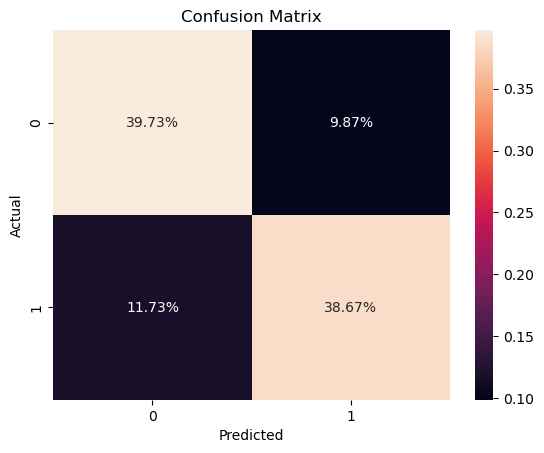

In [58]:
cf_matrix=confusion_matrix(ytest,pred_abc)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

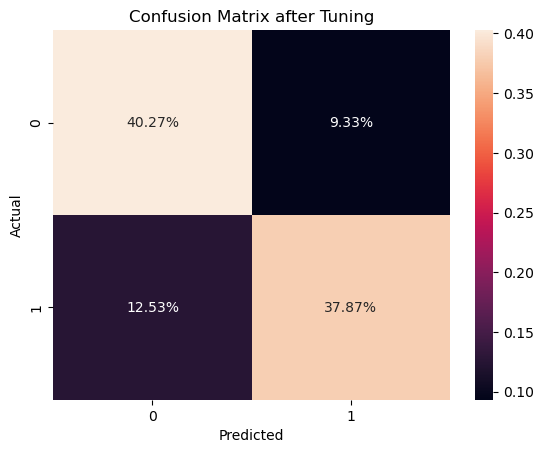

In [59]:

cf_matrix=confusion_matrix(ytest,pred_abc_tuned)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix after Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

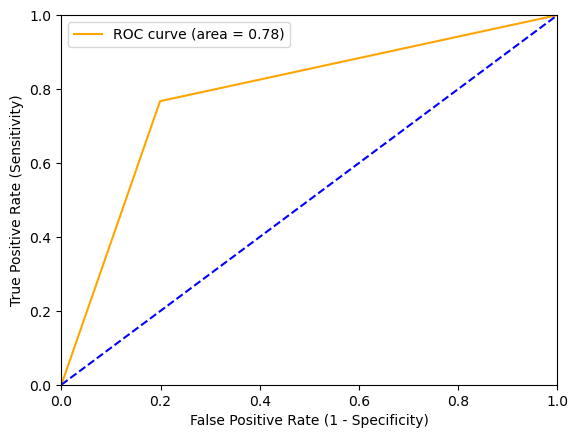

In [60]:
from sklearn.metrics import roc_curve, auc
fpr_abc, tpr_abc, thresholds_abc = roc_curve(ytest, pred_abc)
roc_auc_abc = auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()


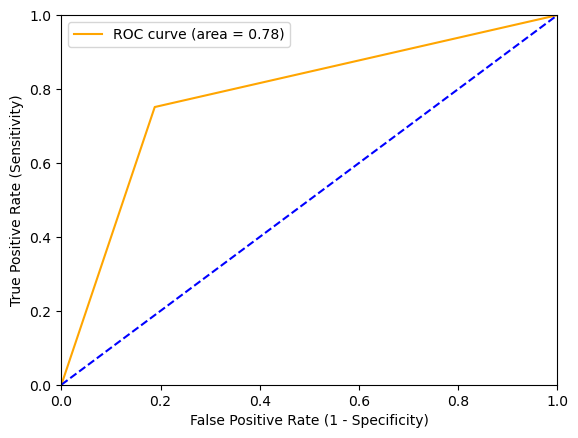

In [61]:
from sklearn.metrics import roc_curve, auc
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve(ytest, pred_abc_tuned)
roc_auc_abc = auc(fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()


In [62]:
print(classification_report(ytest,pred_abc))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       186
           1       0.80      0.77      0.78       189

    accuracy                           0.78       375
   macro avg       0.78      0.78      0.78       375
weighted avg       0.78      0.78      0.78       375



In [63]:
print(classification_report(ytest,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       186
           1       0.80      0.75      0.78       189

    accuracy                           0.78       375
   macro avg       0.78      0.78      0.78       375
weighted avg       0.78      0.78      0.78       375



In [64]:
import pickle 
pickle.dump(abc_tuned,open('model.pkl','wb'))


In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(ytest,pred_abc_tuned))
print(mean_squared_error(ytest,pred_abc_tuned))
print(r2_score(ytest,pred_abc_tuned))

0.21866666666666668
0.21866666666666668
0.12527735108380278


In [66]:
print('Accuracy after tuning=',accuracy_score(ytest,pred_abc_tuned))

Accuracy after tuning= 0.7813333333333333


In [67]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')